## часть . Приоритизация гипотез.

### Вводные данные

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Выведем их на экран:

In [1]:
# Загружаем библиотеки для обоих частей проекта
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Таблица выглядит красиво, но соблюдаем правила оформления - переходим в нижний регистр

In [3]:
data.columns = data.columns.str.lower()

### Задачи
#### 
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Задача
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [4]:
data['ICE'] = round((data['impact'] * data['confidence']) / data['efforts'],1)
display (data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.2
0,"Добавить два новых канала привлечения трафика,...",13.3
7,Добавить форму подписки на все основные страни...,11.2
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.3
3,"Изменить структура категорий, что увеличит кон...",1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0


Гипотезы 1, 8, 9 - самые интересные. Гипотезы 3 и 7 держим "на карандаше"

####  
Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
print (data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


По методу RICE однозначный лидер - гипотеза 8. Так же стоит обратить внимание на гипотезы 1, 3 и 7

### Выводы
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Метод RICE отличается от ICE учетом влияния охвата аудитории. Поэтому лидер ICE-метода - гипотеза 9 - за счет мизерного охвата оказалась слабой в методе RICE.

Гипотеза 8, выглядевшая сильной по ICE за счет охвата оказалась потенциально самой интересной для работы.

**ВЫВОД**
По итогам ICE и RICE анализа я выбрал бы для проработки гипотезы 8, 3 и 1

In [6]:
print('Гипотеза 8:',data['hypothesis'][7], '- максимальный охват и существенное воздействие при средних затратах')
print ()
print('Гипотеза 3:',data['hypothesis'][2], '- высокий охват с высокой уверенность в успех при низких затратах')
print ()
print('Гипотеза 1:',data['hypothesis'][0], '- сильное воздействие с большой уверенностью в результате со средними затратами - таргетированное воздествие на определенную группу')      

Гипотеза 8: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - максимальный охват и существенное воздействие при средних затратах

Гипотеза 3: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - высокий охват с высокой уверенность в успех при низких затратах

Гипотеза 1: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - сильное воздействие с большой уверенностью в результате со средними затратами - таргетированное воздествие на определенную группу


## часть. Анализ A/B-теста.
### Вводные данные

In [7]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
display (orders.head(10))
display (visitors.head(10))
orders.info()
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
# Проверка дупликатов
orders.duplicated().sum()

0

In [9]:
visitors.duplicated().sum()

0

In [10]:
# Проверим составы групп и количество уникальных пользователей.
print(orders.groupby('group')['visitorId'].count())
orders['visitorId'].nunique()

group
A    557
B    640
Name: visitorId, dtype: int64


1031

### Задачи

#### Постройте график кумулятивной выручки по группам. 
Сделайте выводы и предположения.

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] 
                <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 
                'group' : 'max','transactionId' : 'nunique', 'visitorId' : 'nunique', 
                'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] 
   <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 
   'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [12]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], 
                 right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


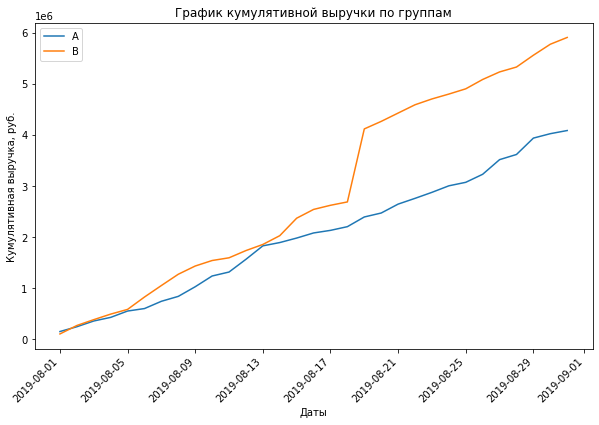

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]
plt.figure(figsize=(10, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивная выручка, руб.')
plt.xticks(rotation=45, horizontalalignment='right')

plt.legend(); 

Выручка растет в обеих группах равномерно, за исклчением нескольких скачков, вызванных, вероятно, большим заказом или большим количеством заказов.

На протяжении всего теста группа B постоянно слегка опережает группу А до явного скачка.

#### Постройте график кумулятивного среднего чека по группам. 
Сделайте выводы и предположения.

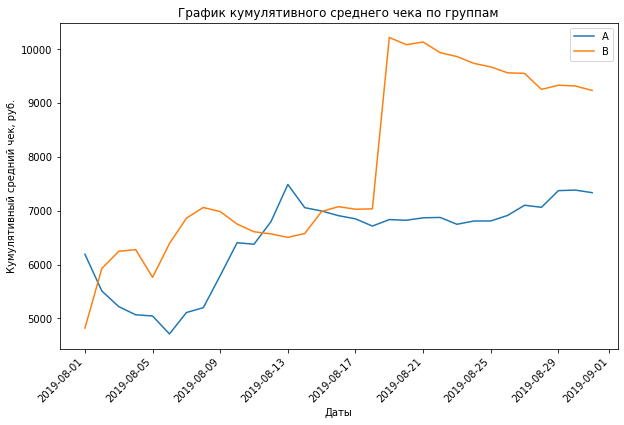

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивный средний чек, руб.')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(); 

Средний чек группы А к середине периода теста уже близок к установившемуся уровню, но через заказы, которые, вероятно, относятся к аномальным, судя по скачкообразному росту. 

В группе В средний чек до большой аномалии стал раньше приближаться к уровню установившихся значений, но большой заказ естественно поднял средний чек, почле чего значение стало снижаться. До своего установшегося уровня группа B в таком виде дойдет гораздо позже окончания теста.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. 
Сделайте выводы и предположения.

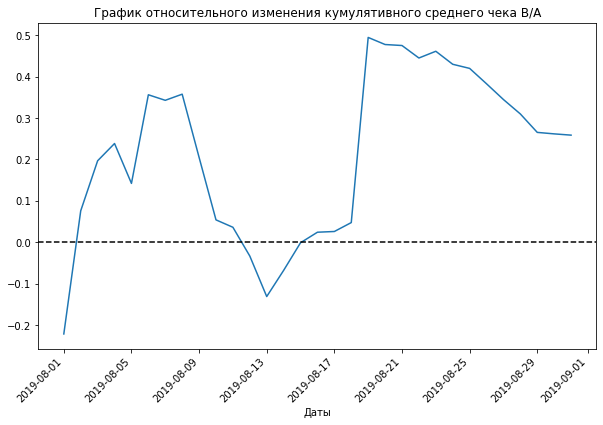

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Даты')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('График относительного изменения кумулятивного среднего чека В/А');

На графике относительного изменения кумулятивного среднего чека еще более отчетливо видно влияние аномалий из-за резких изменений значения параметра как численно, так и по знаку.


#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. 
Сделайте выводы и предположения.

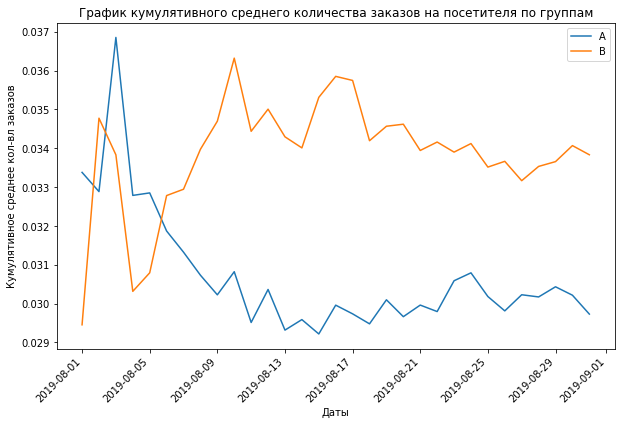

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивное среднее кол-вл заказов')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(); 

По итогам нескольких дней исследования и накопления данных графики обоих групп стабилизировались, но аномалия в группе B подняла график, после чего значение среднего количества заказов стало иметь тенденцию на снижение, т.к значимость аномалии при увеличении количества данных снижается.

При это график группы А явно отстает от группы В.

Вывод-размышление:  Группа В на сырых данных выглядит явно лучше и хочется посомтреть те же графики на очищенных данных. Но внутри меня возникает вопрос - аномальные двнные могут являться следствием разделения на группы - не сделали бы что-то новое, не получили бы такой большой заказ или просто сразу много заказов. То есть  большой закаказ конечно же редкость, но редкость "законная", влияние которой стоит учитывать.

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
Сделайте выводы и предположения.

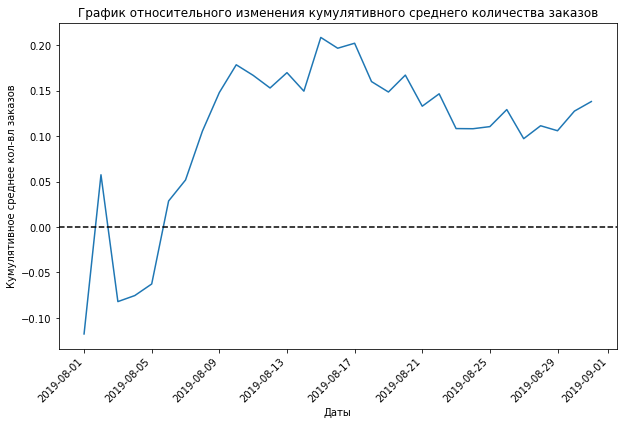

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeOrders = cumulativeRevenueA.merge(cumulativeRevenueB, 
                         left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних количеств заказов
plt.figure(figsize=(10, 6))
plt.plot(mergedCumulativeOrders['date'], 
    (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])
         /(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Даты')
plt.ylabel('Кумулятивное среднее кол-вл заказов')
plt.xticks(rotation=45, horizontalalignment='right');

При накоплении данных отношение среднего количества заказов стабилизируется в районе 0,15, то есть среднее количетво заказов на пользователя в группе В на ~15% выше, чем в группе А.  

#### Постройте точечный график количества заказов по пользователям. 
Сделайте выводы и предположения.

In [18]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
 
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


По сухим цифрам 4 пользователя отличаются от ровного строя остальных из первой десятки. Посмотрим тоже самое в точках.

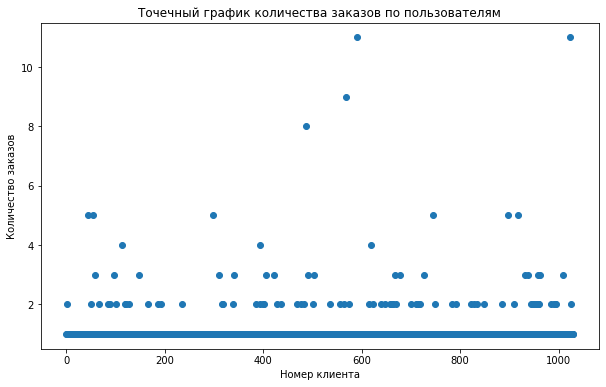

In [19]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 6))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Номер клиента')
plt.ylabel('Количество заказов'); 

В точках виден следующий вывод: 1-2 заказа - это норма, 3 заказа - редкость, 4 и более - единичные случаи, которые можно отнести к аномалиям. Проверим по перцентилям.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 
Выберите границу для определения аномальных пользователей.

In [20]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


5% пользователей оформили 3 и более заказов, 1 % пользователе оформили 5 и более заказов. Верхней границей выберу **3 заказа**, т.к. данных с 4 заказами судя по графику меньшне, чем с 5-ю, так что много не потеряем.

#### Постройте точечный график стоимостей заказов. 
Сделайте выводы и предположения.

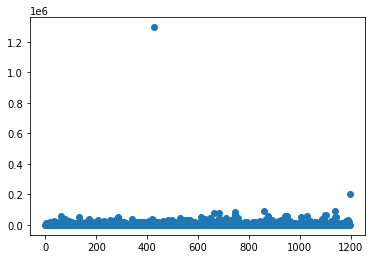

In [21]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']); 

Точную границу выбросов здесь не определить.

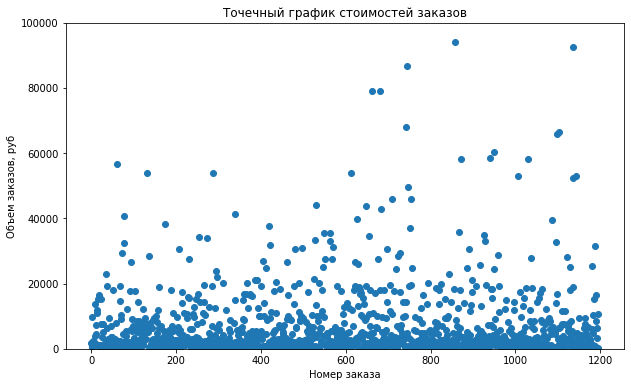

In [22]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 6))
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Номер заказа')
plt.ylabel('Объем заказов, руб')
plt.ylim([0, 100000]); 

При отьрасывании явных аномалий картина станоися более ясной. Вместе с процентилями можно будет назначить корректную границу по аномаоиям.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. 
Выберите границу для определения аномальных заказов.

In [23]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


5% заказов на сумму более 28000 рублей, 1 % заказов на сумму более 58233 рублей. Осторожно отрезать можно на уровне **50 000 рублей**.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
Сделайте выводы и предположения.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.
**Уровень значимости alpha приму равным 0.05**

In [24]:
# Собираем данные по группам в одном датафрейме
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

dataset = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(dataset.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [25]:
# Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [26]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп 
# будет соответствовать количество заказов. 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, 
        index=np.arange(dataset['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, 
        index=np.arange(dataset['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
        name='orders')],axis=0)

In [27]:
# Выведем относительный прирост среднего числа заказов группы B: 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                dataset['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                dataset['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value =',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B =',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

P-value = 0.017
Относительный прирост среднего числа заказов группы B = 0.138


P-value меньше **0,05**, значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. **Различия по сырым данным есть**.
Относительный выигрыш группы В - 13.8%

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

In [28]:
print('P-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B к А =','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value = 0.729
Относительный прирост среднего чека группы B к А = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
Сделайте выводы и предположения.

Срежем пользователей с числом заказов больше 3 и суммой заказов более 50 000 рублей.

Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 50 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [29]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
1137    759473111
949     887908475
Name: visitorId, dtype: int64
26


Всего 26 аномальных пользователя убираются из датасета

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

Сформулируем гипотезы на очищенных данных. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Уровень значимости alpha приму равным 0.05


Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [30]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                dataset['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                dataset['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [31]:
# Применим статистический критерий Манна-Уитни к полученным отфильтрованным выборкам:
print('P-value =','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B =','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value = 0.011
Относительный прирост среднего числа заказов группы B = 0.158


P-value еще уменьшился, оставаясь  меньше 0,05.
Отношение среднего количества заказов увеличилось в сторону группы В

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
Сделайте выводы и предположения.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [32]:
print('P-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B к А =',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value = 0.819
Относительный прирост среднего чека группы B к А = 0.024


#### Примите решение по результатам теста и объясните его. 
По итогам теста принимается решение **Остановить тест, зафиксировать победу группы В.**

- Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий. Отношение числа заказов между группами достигает 15.8% - Это явный успех заказчика.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, но есть разница в относительном чеке по группам - аномалии довели различие до 26%, в то время как без них разница составляет всего 2,4%.

График различия среднего количества заказов подтверждает, что результаты группы В гораздо лучше группы А. Цель достигнута

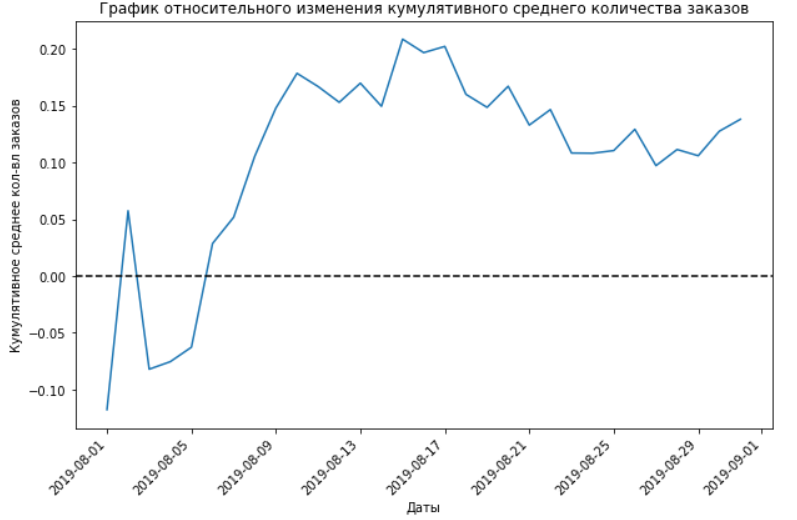

График различия среднего чека так же говорит о том, что результаты группы B лучше. Без учета аномалий группа В все равно показала лучше результат, хоть и не такой значительный.

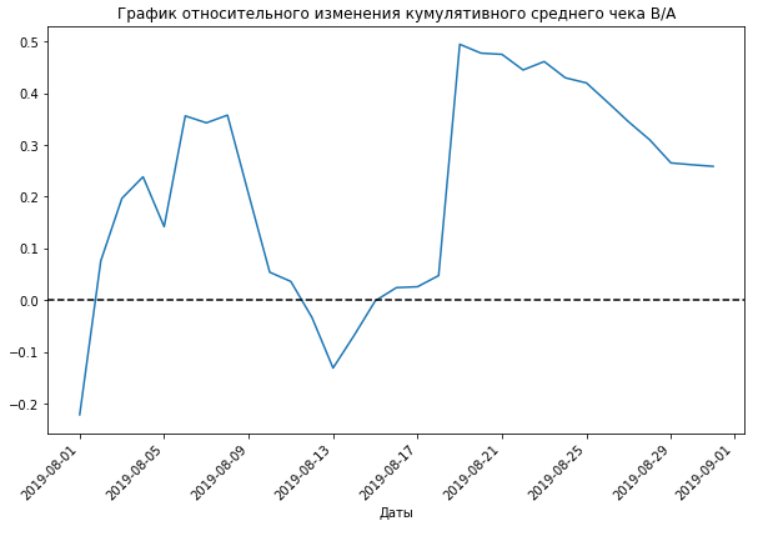

То есть без учета аномалий можно зафиксировать прирост количества заказов на 15-16% при практически неизменном среднем чеке. Произошло **привлечение новых клиентов**.

С учетом аномалий результаты группы B становятся позитивными и по среднему чеку.